In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Aljazeera\Downloads\Compressed\Neural Network\FuelConsumptionCo2.csv')

In [8]:
df.head()

,MODELYEAR,Brands,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
df.duplicated().sum()

np.int64(115)

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df=df.drop(['MODELYEAR','Brands','VEHICLECLASS','TRANSMISSION'],axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['FUELTYPE'] = le.fit_transform(df['FUELTYPE'])

In [14]:
df

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,3,9.9,6.7,8.5,33,196
1,2.4,4,3,11.2,7.7,9.6,29,221
2,1.5,4,3,6.0,5.8,5.9,48,136
3,3.5,6,3,12.7,9.1,11.1,25,255
4,3.5,6,3,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...
1061,3.2,6,2,13.0,8.9,11.2,25,258
1062,3.0,6,2,13.4,9.8,11.8,24,271
1063,3.2,6,2,13.2,9.5,11.5,25,264
1065,3.2,6,2,12.9,9.3,11.3,25,260


In [15]:
df.describe()

,ENGINESIZE,CYLINDERS,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,3.320903,5.735294,2.231092,13.244538,9.462185,11.546324,26.550420,255.278361
std,1.391885,1.756255,0.720118,4.107981,2.828784,3.504167,7.524064,63.305538
min,1.000000,3.000000,0.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2.000000,4.000000,2.000000,10.300000,7.500000,9.000000,21.000000,207.000000
50%,3.400000,6.000000,2.000000,12.600000,8.800000,10.900000,26.000000,250.000000
75%,4.000000,6.000000,3.000000,15.300000,10.600000,13.200000,31.000000,292.000000
max,8.400000,12.000000,3.000000,30.200000,20.500000,25.800000,60.000000,488.000000


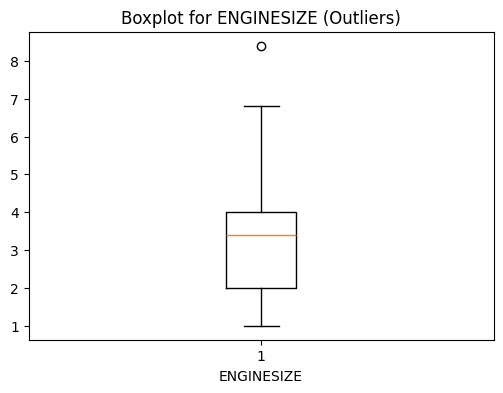

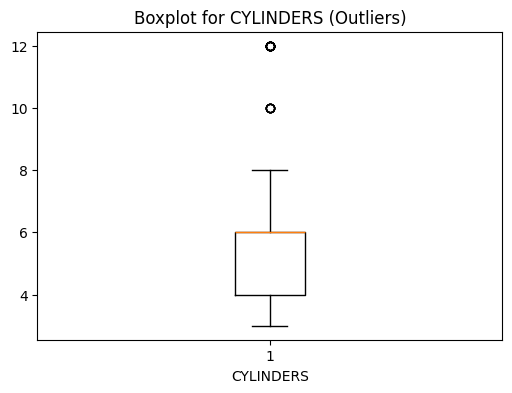

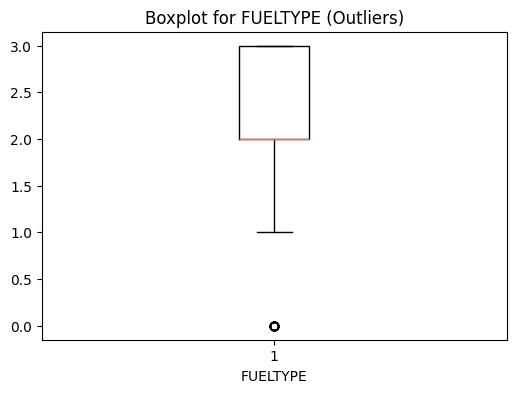

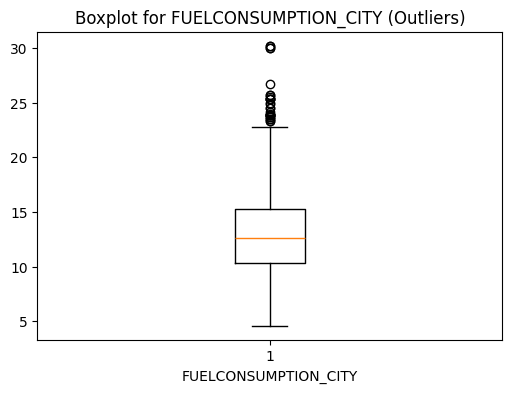

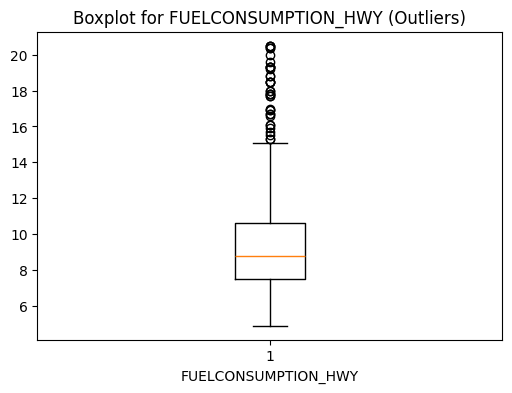

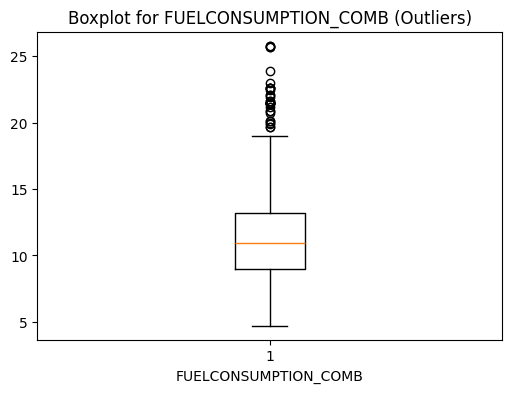

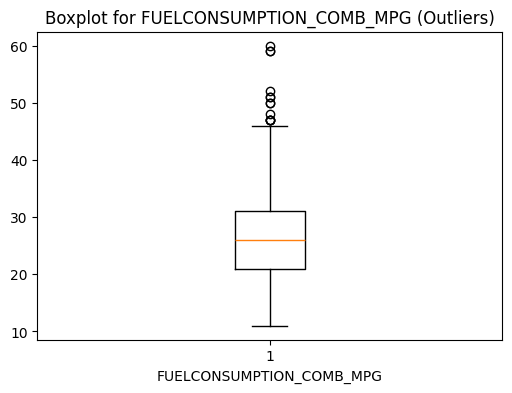

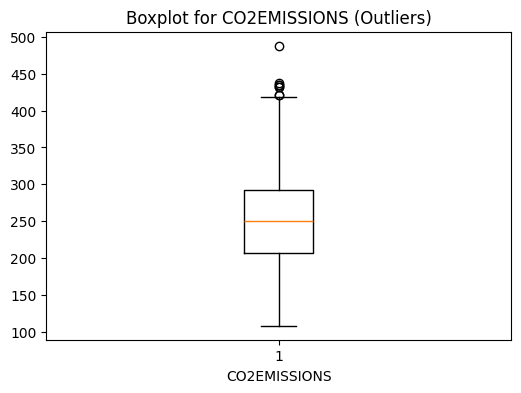

In [16]:
import matplotlib.pyplot as plt
# Select only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['number']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    # رسم Boxplot للعمود
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot for {col} (Outliers)")
    plt.xlabel(col)
    plt.show()

In [17]:
for col in numerical_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower_bound,upper_bound)

In [18]:
# Separate features (X) and target (y)
X = df.drop('CO2EMISSIONS', axis=1)
y = df['CO2EMISSIONS']

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Normalize numerical features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:

# Build a simple deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1)) # Output layer for regression

C:\Users\Aljazeera\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 69786.8047 - val_loss: 64794.0391
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69292.8750 - val_loss: 64080.7930
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 68247.9766 - val_loss: 62634.0117
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 66129.5391 - val_loss: 59828.3320
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 62311.9297 - val_loss: 55054.8047
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 56276.9375 - val_loss: 48055.0898
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47897.8086 - val_loss: 39067.4727
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37652.0391 - val_loss: 28747.0527
Epoch 9/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 26679.3945 - val_loss: 18454.6211
Epoch 10/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16360.8096 - val_loss: 9999.6719
Epoch 11/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8429.8652 - val_loss

In [24]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss (Mean Squared Error): {loss}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 418.3589 
Test loss (Mean Squared Error): 418.3589172363281


In [25]:
# Make predictions
predictions = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [26]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Absolute Error (MAE): 16.043199069837
R-squared (R2): 0.8880396624067564


In [27]:
loss = pd.DataFrame(model.history.history)

<Axes: >

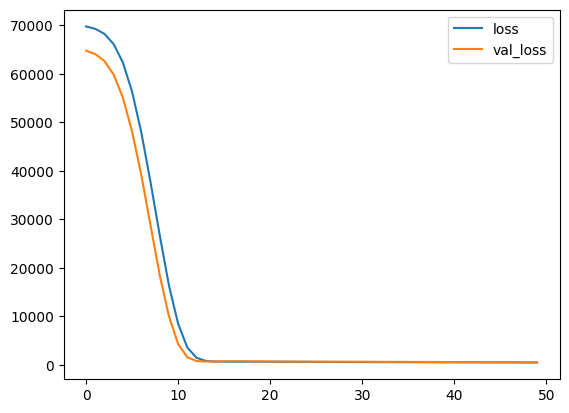

In [28]:
loss.plot()

In [29]:
# الصيغة الموصى بها (Keras format)
model.save("car_price_model.keras")# الصيغة الموصى بها (Keras format)
